# CODSOFT TASK 1

# TITANIC SURVIVAL PREDICTION

Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

What particularly we need do in this challenge ?

In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy?

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



In [68]:
train1 = pd.read_csv(r"C:\Users\Abhishek gupta\Downloads\archive.zip")
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [69]:
train1.shape

(418, 12)

In [70]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [71]:
train1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [72]:
# drop the Cabin column from the data set
train1=train1.drop(columns="Cabin",axis=1)

In [73]:

#replacing the missing values in"age" column with mean value
train1['Age'].fillna(train1['Age'].mean(),inplace=True)

In [74]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [75]:

train1['Fare'].fillna(train1['Fare'].mean(),inplace=True)

In [76]:
train1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [77]:
train1.Survived.value_counts()/len(train1)*100

0    63.636364
1    36.363636
Name: Survived, dtype: float64

In [78]:
#getting some stastical measure
train1.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [79]:
#finding number of people survived
train1['Survived'].value_counts()


0    266
1    152
Name: Survived, dtype: int64

In [80]:
train1['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

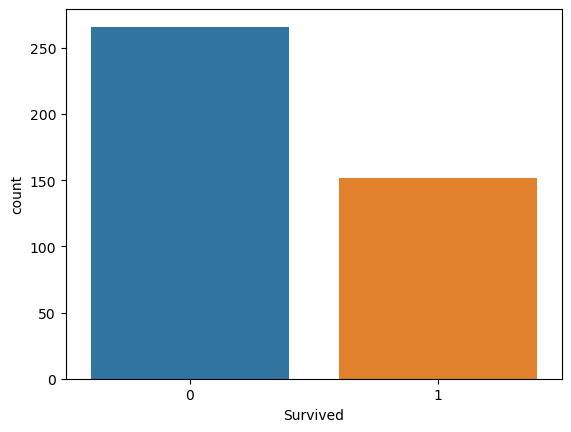

In [81]:
sns.countplot(x="Survived",data=train1)

In [82]:
train1['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

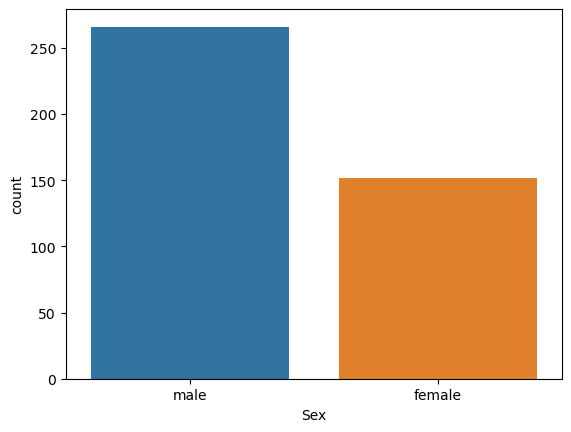

In [83]:
sns.countplot(x="Sex",data=train1)

<Axes: xlabel='Sex', ylabel='count'>

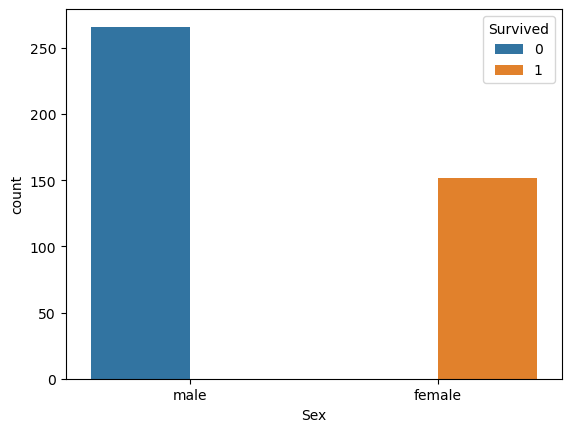

In [84]:
# number of surviver gender wise
sns.countplot(x="Sex",hue='Survived',data=train1)

<Axes: xlabel='Pclass', ylabel='count'>

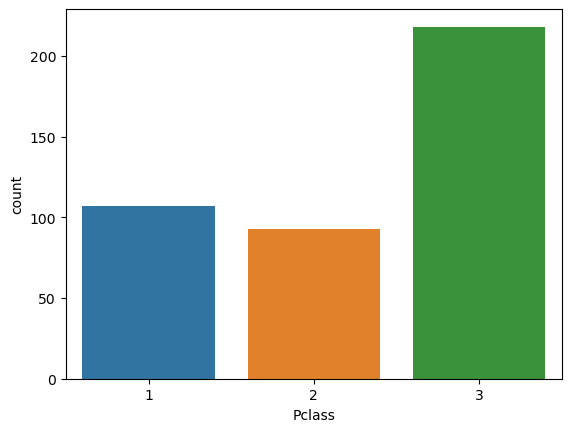

In [85]:
sns.countplot(x="Pclass",data=train1)

<Axes: xlabel='Pclass', ylabel='count'>

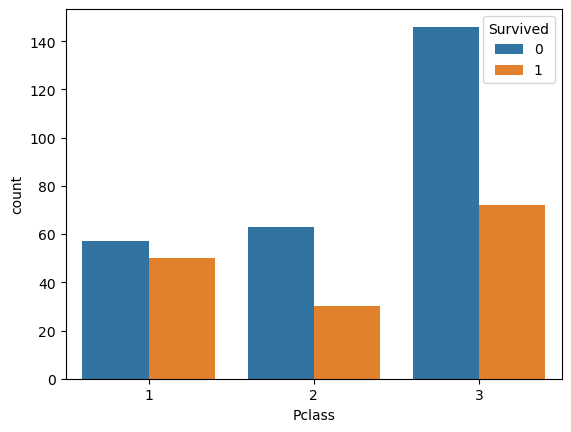

In [86]:
sns.countplot(x="Pclass",hue="Survived",data=train1)

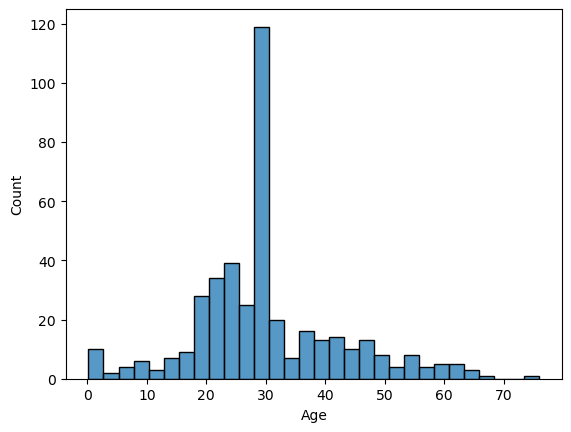

In [87]:
sns.histplot(data=train1,x=train1['Age'],kde=False,bins=30);

<Axes: ylabel='Age'>

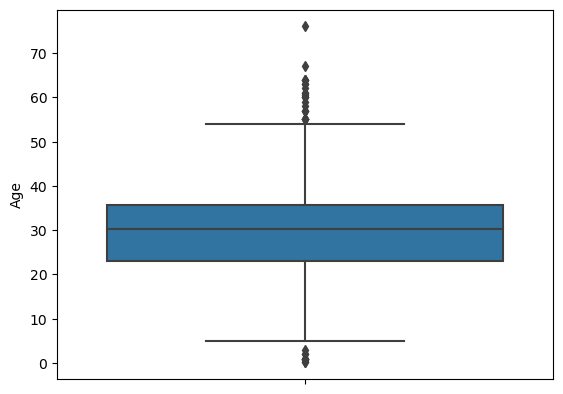

In [88]:
sns.boxplot(data=train1,y='Age')

In [89]:
train1.groupby('Pclass').Age.median()

Pclass
1    39.0
2    28.0
3    29.5
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

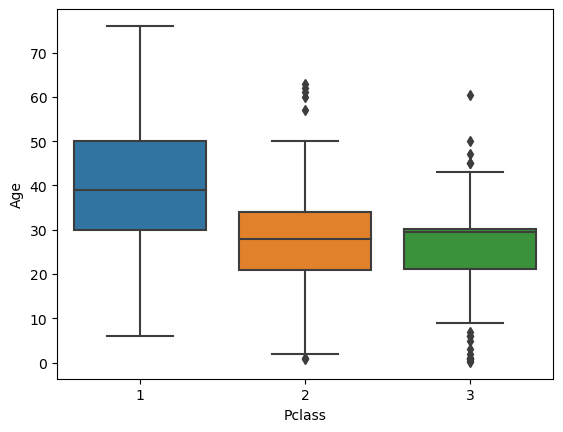

In [90]:
sns.boxplot(data=train1,x='Pclass',y='Age')

In [91]:
train1.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    39.00000
        male      41.00000
2       female    24.00000
        male      29.00000
3       female    28.50000
        male      30.27259
Name: Age, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

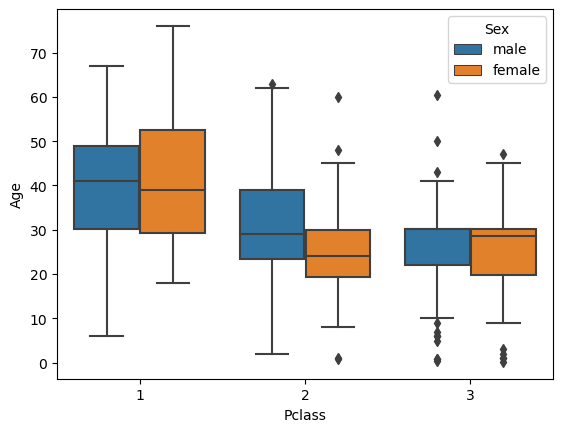

In [92]:
sns.boxplot(data=train1,x='Pclass',y='Age',hue='Sex')

<Axes: xlabel='SibSp', ylabel='count'>

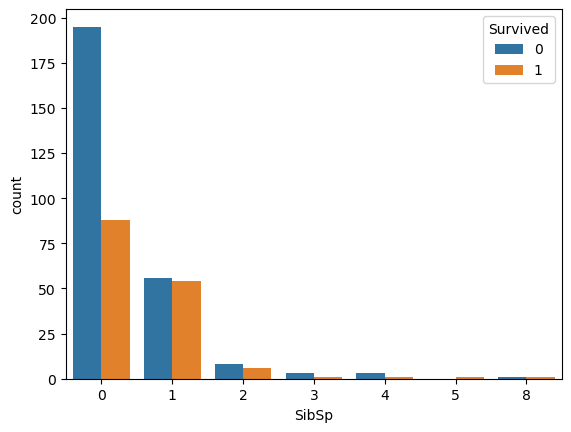

In [93]:
sns.countplot(data=train1,x='SibSp',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

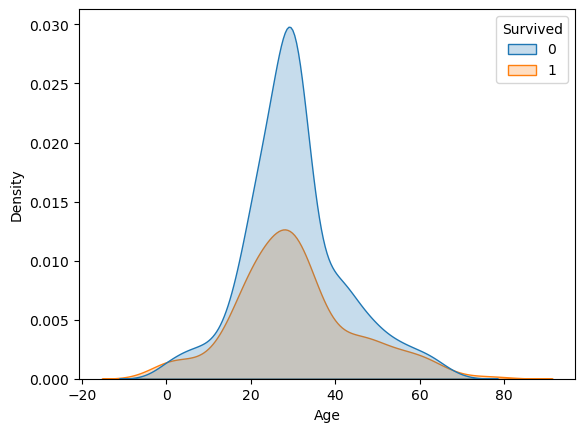

In [94]:
sns.kdeplot(data=train1,x='Age',hue='Survived',fill=True)

# fare

In [95]:
train1.groupby('Survived').Fare.median()

Survived
0    13.0000
1    21.5125
Name: Fare, dtype: float64

<Axes: xlabel='Survived', ylabel='Fare'>

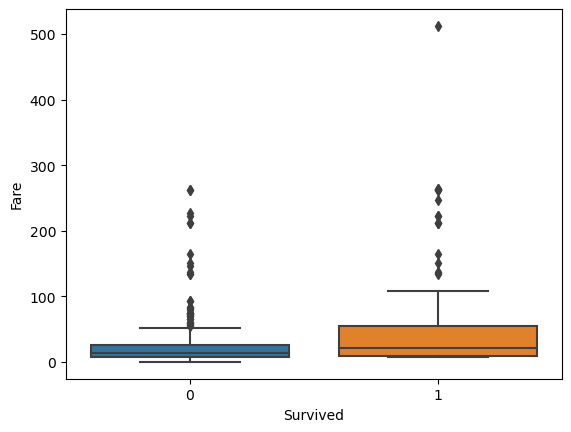

In [96]:
sns.boxplot(data=train1,x='Survived',y='Fare')

<Axes: xlabel='Fare', ylabel='Density'>

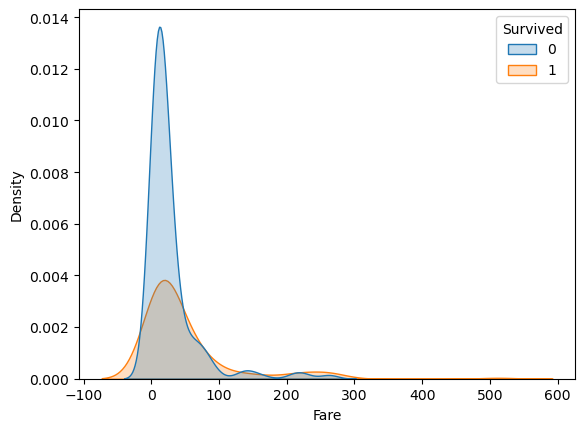

In [97]:
sns.kdeplot(data=train1,x='Fare',hue='Survived',fill=True)

# Ticket

In [98]:
ticket=train1.Ticket.value_counts(dropna=False)
ticket

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [99]:
ticket[ticket!=1]

PC 17608              5
CA. 2343              4
113503                4
PC 17483              3
220845                3
347077                3
SOTON/O.Q. 3101315    3
C.A. 31029            3
16966                 3
230136                2
C.A. 33112            2
28220                 2
PC 17756              2
29103                 2
347072                2
W./C. 6607            2
CA 31352              2
CA 2144               2
2660                  2
112378                2
13508                 2
13695                 2
113781                2
315153                2
19950                 2
2650                  2
F.C.C. 13534          2
350405                2
C.A. 2315             2
13236                 2
24065                 2
A/5. 851              2
21228                 2
2662                  2
C 4001                2
11778                 2
33638                 2
12749                 2
36928                 2
13050                 2
S.O./P.P. 2           2
S.O.C. 14879    

In [100]:
group_list=list(ticket[ticket!=1].index)
group_list

['PC 17608',
 'CA. 2343',
 '113503',
 'PC 17483',
 '220845',
 '347077',
 'SOTON/O.Q. 3101315',
 'C.A. 31029',
 '16966',
 '230136',
 'C.A. 33112',
 '28220',
 'PC 17756',
 '29103',
 '347072',
 'W./C. 6607',
 'CA 31352',
 'CA 2144',
 '2660',
 '112378',
 '13508',
 '13695',
 '113781',
 '315153',
 '19950',
 '2650',
 'F.C.C. 13534',
 '350405',
 'C.A. 2315',
 '13236',
 '24065',
 'A/5. 851',
 '21228',
 '2662',
 'C 4001',
 '11778',
 '33638',
 '12749',
 '36928',
 '13050',
 'S.O./P.P. 2',
 'S.O.C. 14879']

In [101]:
train1['is_group']=train1.Ticket.isin(group_list)*1
train1['is_group']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: is_group, Length: 418, dtype: int32

<Axes: xlabel='is_group', ylabel='count'>

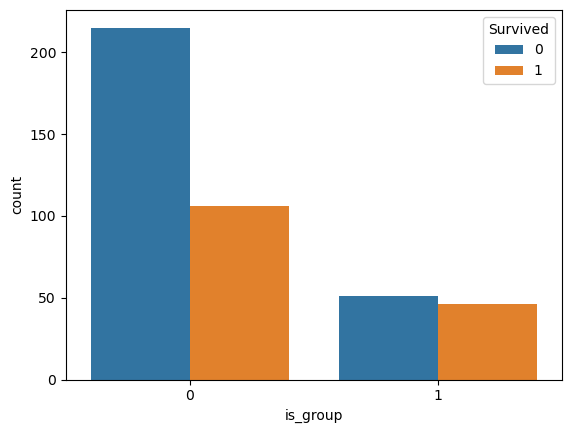

In [102]:
sns.countplot(data=train1,x='is_group',hue='Survived')

In [103]:
train1.SibSp

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: SibSp, Length: 418, dtype: int64

In [104]:
train1.Parch

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: Parch, Length: 418, dtype: int64

In [106]:
train1.Name


0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [109]:
train1.Name.sample(10)

13                       Howard, Mr. Benjamin
145                 Vander Planke, Mr. Julius
372                   Ismay, Mr. Joseph Bruce
56                            Cor, Mr. Bartol
214    Andersson, Miss. Ida Augusta Margareta
286    Franklin, Mr. Charles (Charles Fardon)
307                 Aks, Master. Philip Frank
410                    Naughton, Miss. Hannah
379               Asplund, Master. Carl Edgar
62               Bjorklund, Mr. Ernst Herbert
Name: Name, dtype: object

In [111]:
train1.Name.str.split(',').str[1].str.split("(").str[0].str.split('"').str[0].str.split('.')

0                [ Mr,  James]
1              [ Mrs,  James ]
2       [ Mr,  Thomas Francis]
3               [ Mr,  Albert]
4          [ Mrs,  Alexander ]
                ...           
413              [ Mr,  Woolf]
414          [ Dona,  Fermina]
415    [ Mr,  Simon Sivertsen]
416          [ Mr,  Frederick]
417      [ Master,  Michael J]
Name: Name, Length: 418, dtype: object

In [112]:
train1.Name.str.extract('\w+\.\s(\w*\s*\w*)')

,0
0,James
1,James
2,Thomas Francis
3,Albert
4,Alexander
...,...
413,Woolf
414,Fermina
415,Simon Sivertsen
416,Frederick


In [114]:
train1['Name'] =  train1.Name.str.extract("\w+\.\s(\w*\s*\w*)" )
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group
0,892,0,3,NaN,male,34.50000,0,0,330911,7.8292,Q,0
1,893,1,3,NaN,female,47.00000,1,0,363272,7.0000,S,0
2,894,0,2,NaN,male,62.00000,0,0,240276,9.6875,Q,0
3,895,0,3,NaN,male,27.00000,0,0,315154,8.6625,S,0
4,896,1,3,NaN,female,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,male,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,1,NaN,female,39.00000,0,0,PC 17758,108.9000,C,0
415,1307,0,3,NaN,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,0,3,NaN,male,30.27259,0,0,359309,8.0500,S,0


C:\Users\Abhishek gupta\AppData\Local\Temp\ipykernel_11276\1460270626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train1.corr(),annot=True)


<Axes: >

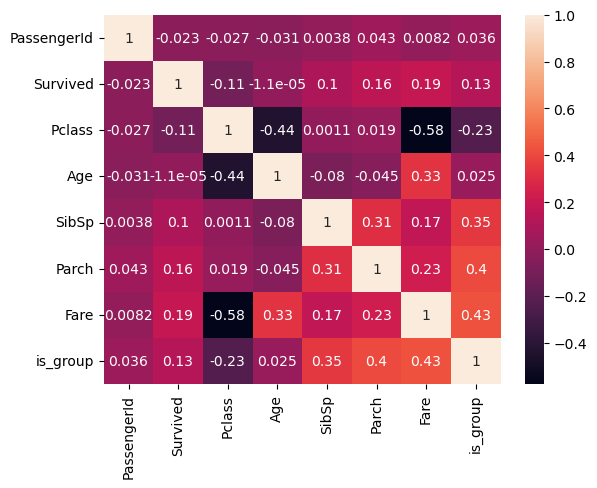

In [122]:
sns.heatmap(train1.corr(),annot=True)

# encoding to categrocial columns

In [30]:
train1['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [31]:
train1['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
#Converting categrocial column
train1.replace({"Sex":{'male':0,'female':1},"Embarked":{'S':0,'C':1,'Q':2}},inplace=True) 

In [33]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [35]:
X=train1.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
Y=train1["Survived"]

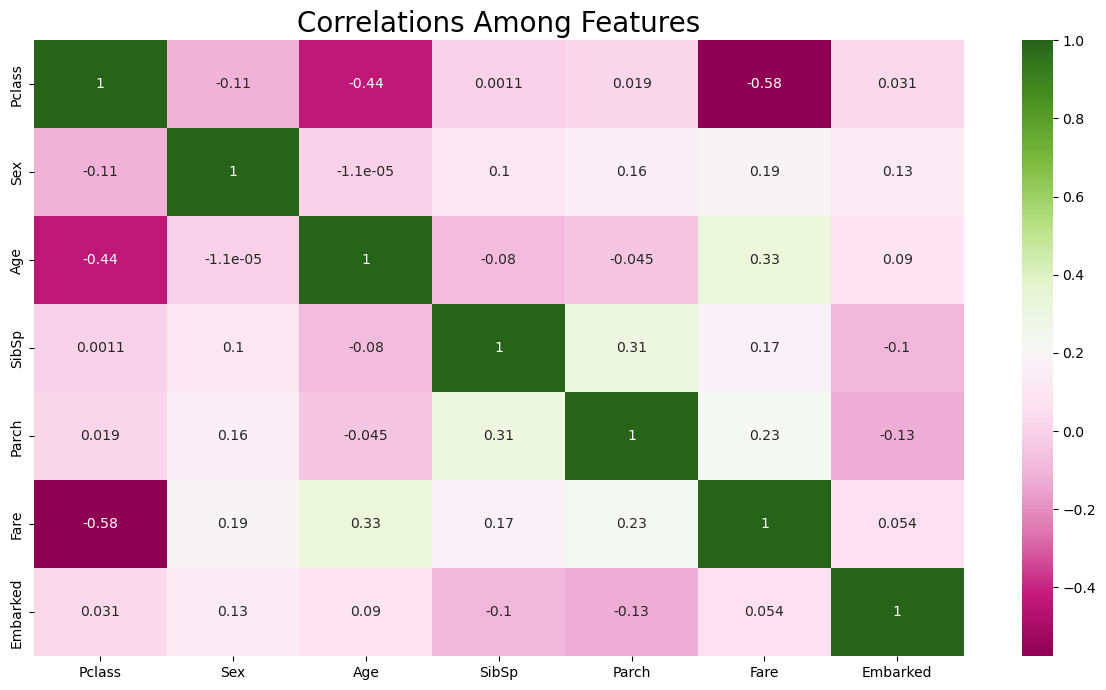

In [36]:
plt.subplots(figsize = (15,8))
sns.heatmap(X.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

In [37]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [38]:
print(Y)


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


# LOGISTIC REGRESSION MODEL

In [41]:
model=LogisticRegression()

In [42]:
#training the Logistic model with training data
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

ACCURACY SCORE

In [43]:
X_train_prediction=model.predict(X_train)

In [44]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [45]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [47]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [48]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [49]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [50]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
#Dataset source:https://www.kaggle.com/datasets/brendan45774/test-file

This Project is made by Abhishek Kumar during internship at codsoft